### Define the State

In [24]:
from typing import TypedDict

class State(TypedDict):
    graph_info:str

### Define the Nodes

In [25]:
def start_play(state:State):
    print("Start Play Node has Been Called...")
    return {"graph_info":state["graph_info"]+" I'm Planning to Reading "}


def story_books(state:State):
    print("Story Books Node has Been Called...")
    return {"graph_info":state["graph_info"]+"  Story Books"}

def moral_books(state:State):
    print("Moral Book Node has Been Called...")
    return {"graph_info":state["graph_info"]+" Moral Books"}

### Define the Logic

In [38]:
import random
from typing import Literal

def random_play(state:State)->Literal["story_books","moral_books"]:


    if random.random()>0.5:
        return "story_books"
    else:
        return "moral_books"

### Design the Graph

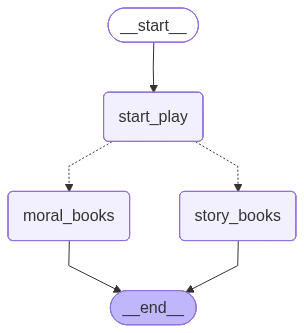

In [39]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

# Build a Graph

# Initilize the Graph
graph = StateGraph(State)

#Adding a NOdes
graph.add_node("start_play",start_play)
graph.add_node("story_books",story_books)
graph.add_node("moral_books",moral_books)

# Add the edges
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("story_books",END)
graph.add_edge("moral_books",END)

#Compile The Graph

graph_builder = graph.compile()

## View The Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [37]:
graph_builder.invoke({"graph_info":"My Name is Husen"})

Start Play Node has Been Called...
Story Books Node has Been Called...


{'graph_info': "My Name is Husen I'm Planning to Reading   Story Books"}